In [ ]:
import sys
sys.path.append('..')
from package.gensim_model import gensim_model
dictionary = "word2vec-google-news-300"
model = gensim_model(dictionary)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Noto Sans CJK SC', 'Arial Unicode MS']

init complete!


In [3]:
word = "country"
similar = model.ETL_similar(word=word)
similar.sort_values(ascending=False).head(20)

country          1.000000
nation           0.724287
continent        0.613089
region           0.601515
thecountry       0.600183
world            0.598039
coun_try         0.591695
United_States    0.570611
countrys         0.564198
coutnry          0.542586
counry           0.520168
Untied_States    0.517220
globe            0.513746
America          0.485846
Unites_States    0.484747
countries        0.482092
national         0.478065
abroad           0.471973
United_Sates     0.470954
countryâ_€_™     0.461571
Name: country, dtype: float32

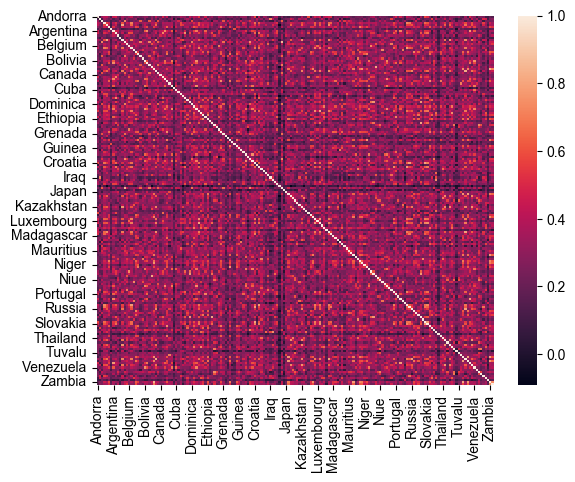

In [ ]:
locale = "en_US"
model.show_locale_heatmap(locale)

['ff_Latn_GW',
 'smj_NO',
 'iu_CA',
 'wo_SN',
 'tr_CY',
 'en_DG',
 'fr_GN',
 'saq',
 'nl_CW',
 'scn',
 'fr_KM',
 'chr_US',
 'arn',
 'ar_OM',
 'szl',
 'bs_Latn_BA',
 'kok_Latn_IN',
 'bm',
 'ar_MR',
 'aa',
 'tpi',
 'trv',
 'nn',
 'kam_KE',
 'ny',
 'es_GQ',
 'ie_EE',
 'lg',
 'byn_ER',
 'fr_PF',
 'mt',
 'no',
 'trw',
 'ha_Arab',
 'prg_PL',
 'ta',
 'ur',
 'vi',
 'hy_AM',
 'sms',
 'sat_Deva_IN',
 'nl_BE',
 'hi_Latn',
 'qu_BO',
 'es_PY',
 'sn_ZW',
 'asa_TZ',
 'ga_GB',
 'sd_Arab',
 'nus',
 'oc_FR',
 'bal',
 'en_JM',
 'lld',
 'ti_ET',
 'en_KI',
 'en_SX',
 'rhg_Rohg_MM',
 'ru_RU',
 'zh_Hant',
 'dsb_DE',
 'ksb',
 'en_SZ',
 'ssy_ER',
 'pa_Arab_PK',
 'ia_001',
 'om_KE',
 'en_GH',
 'apc_SY',
 'pa_Arab',
 'ff_Latn',
 'kgp',
 'zh',
 'mhn',
 'ar_TD',
 'sa_IN',
 'mfe',
 'wo',
 'tt',
 'ug',
 'mua_CM',
 'bn',
 'hnj',
 'ha_Arab_SD',
 'ab',
 'ar_LB',
 'kde_TZ',
 'uz_Cyrl',
 'ta_MY',
 'ca_IT',
 'ar_AE',
 'sat_Olck',
 'en_Dsrt_US',
 'et_EE',
 'kaa_Latn',
 'mai_IN',
 'ta_LK',
 'ar_BH',
 'nl',
 'ksf_CM',
 'blo_